<a href="https://colab.research.google.com/github/CaioEnzo23/Classifica-o-de-risco-de-churn/blob/main/Case4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importação de Bibliotecas e Conjunto de Dados**

Instalação de Bibliotecas

In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 978.8 kB/s eta 0:00:00


In [ ]:
!pip install pandas-profiling
!pip install sidetable
!pip install scikit-learn

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=cf3c7ff849fec33d940f5d1d5a6c9e4c28c7a6e115aa8fb3407c09c6cd161de3
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 942.2 kB/s eta 0:00:00


In [ ]:
%%capture
%pip install KModes

Importação das principais bilbiotecas ultilizadas

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [ ]:
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform
from sklearn.datasets import load_wine

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, kelbow_visualizer, silhouette_visualizer
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

import string
from ipywidgets import interact

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

Carregue o conjunto de dados

In [ ]:
df = pd.read_csv('/content/BankChurner - ATT.csv', delimiter=';')

Exibir dados

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,"0,934",0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,"0,569",0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,"0,211",0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.00013366,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,"0,217",0.99998


#**Tratamento dos Dados**

Estrutura do conjunto de dado

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
df.dtypes

,0
CLIENTNUM,int64
Attrition_Flag,object
Customer_Age,int64
Gender,object
Dependent_count,int64
Education_Level,object
Marital_Status,object
Income_Category,object
Card_Category,object
Months_on_book,int64


Dados duplicados

In [ ]:
duplicados = df.duplicated().sum()

In [ ]:
df_sem_duplicatas = df.drop_duplicates()

#**Limpeza dos Dados**

Valores ausentes

In [ ]:
df.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


Inconsistências nos dados

In [ ]:
df.dtypes

,0
CLIENTNUM,int64
Attrition_Flag,object
Customer_Age,int64
Gender,object
Dependent_count,int64
Education_Level,object
Marital_Status,object
Income_Category,object
Card_Category,object
Months_on_book,int64


In [ ]:
df = df.astype({"CLIENTNUM":"int", "Attrition_Flag":"str",
                 "Customer_Age":"int","Gender":"str",
                 "Dependent_count":"int","Education_Level":"str"})
df.dtypes

,0
CLIENTNUM,int64
Attrition_Flag,object
Customer_Age,int64
Gender,object
Dependent_count,int64
Education_Level,object
Marital_Status,object
Income_Category,object
Card_Category,object
Months_on_book,int64


In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,"0,934",0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,"0,569",0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,"0,211",0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.00013366,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,"0,217",0.99998


#**Análise Exploratória de Dados (EDA)**

Visualização da Variável Dependente

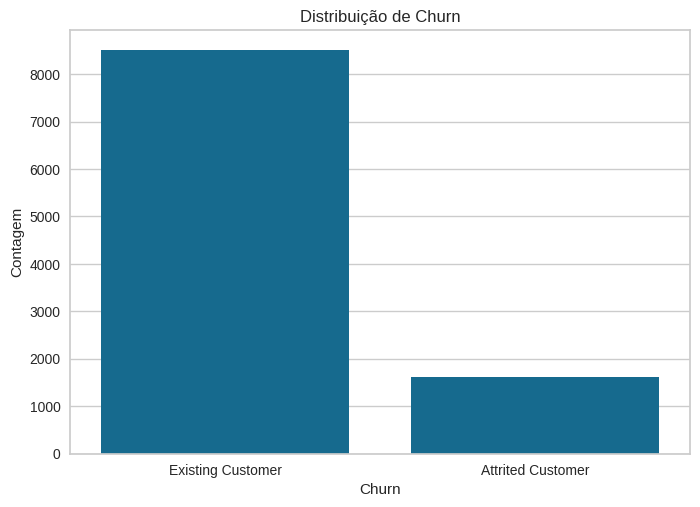

In [ ]:
sns.countplot(x='Attrition_Flag', data=df)
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Contagem')
plt.show()

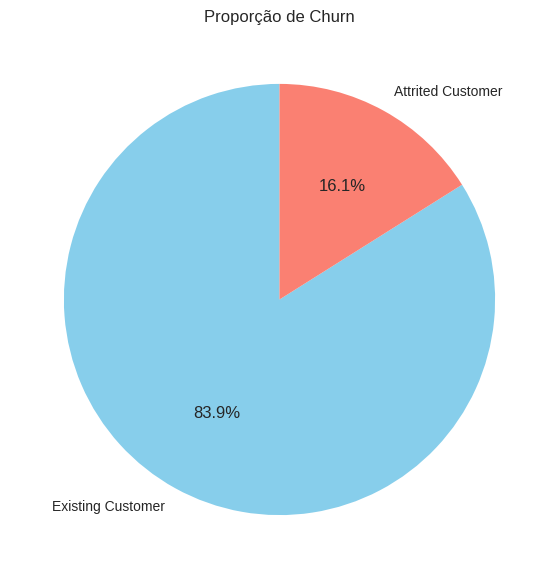

In [ ]:
df['Attrition_Flag'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90, figsize=(7,7))
plt.title('Proporção de Churn')
plt.ylabel('')
plt.show()

Visualização das Variáveis Independentes

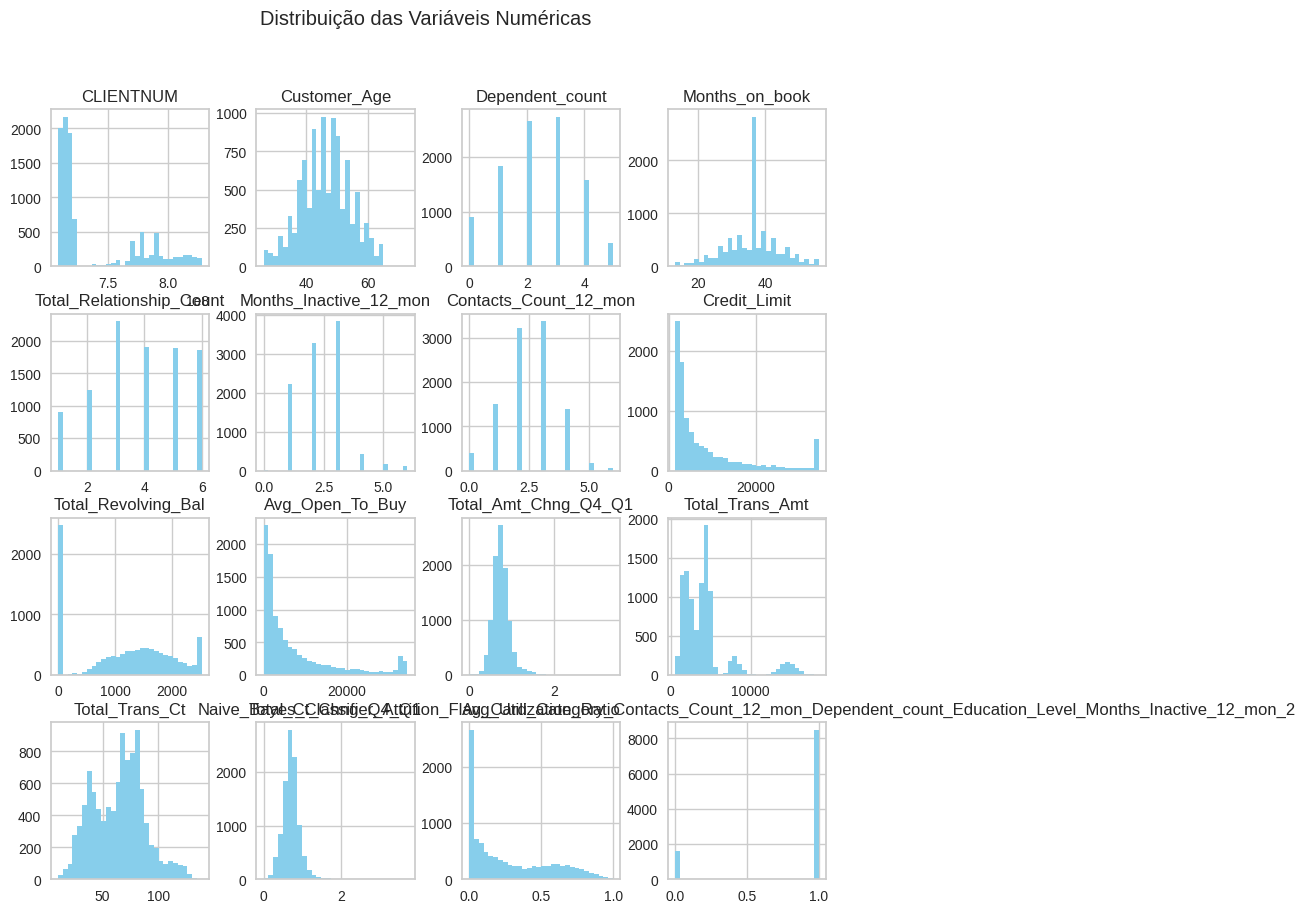

In [ ]:
df.hist(bins=30, figsize=(10,10), color='skyblue')
plt.suptitle('Distribuição das Variáveis Numéricas')
plt.show()

#**Pré-processamento dos Dados**

Seleção e Importância de Variáveis

In [ ]:
y = df['Attrition_Flag']
X = df.drop(columns=['Attrition_Flag'])

In [ ]:
X = pd.get_dummies(X)

In [ ]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [ ]:
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

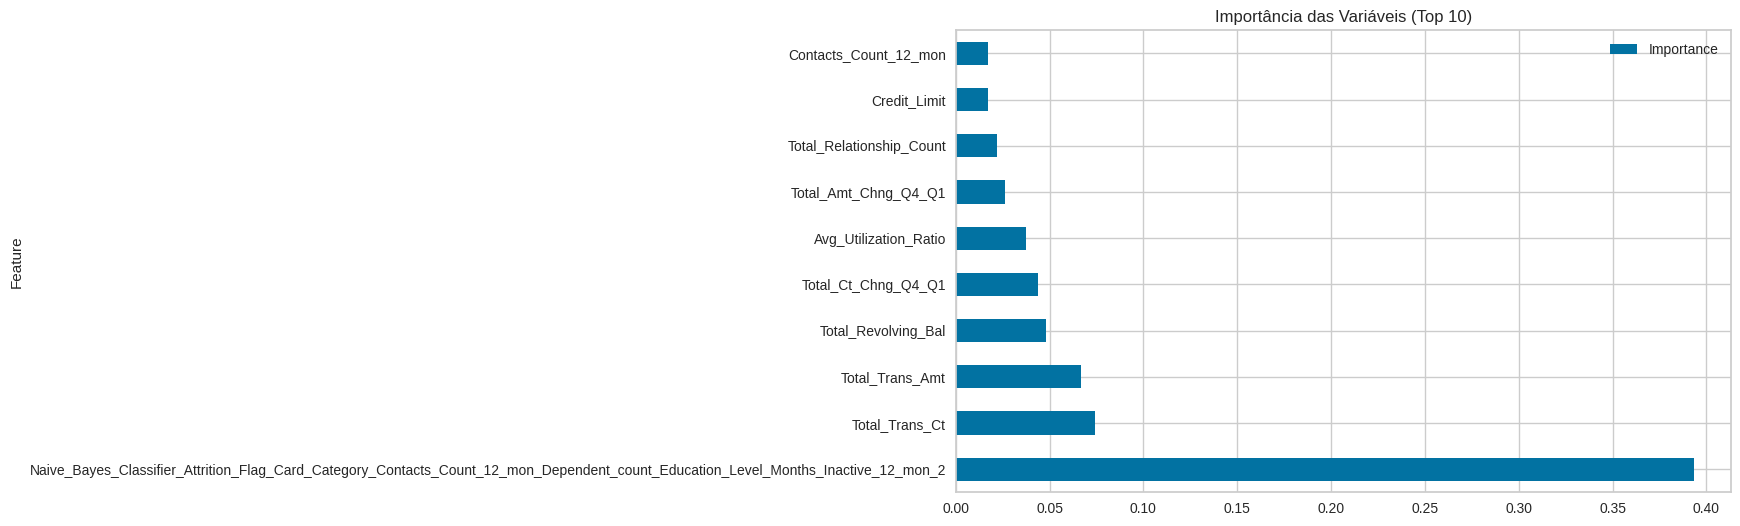

In [ ]:
top_n = 10  # Número de variáveis que você quer visualizar
top_features = importance_df.head(top_n)

# Gerar o gráfico para as 20 variáveis principais
top_features.plot(kind='barh', x='Feature', y='Importance', title='Importância das Variáveis (Top 10)', figsize=(10, 6))
plt.show()

Transformação de Características, Dimensionamento e Codificação

In [ ]:
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

Divisão dos Dados para Treinamento do Modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Aplicação do SMOTE para reduzir desequilíbrio de classes

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train_resampled.value_counts())

Attrition_Flag
Existing Customer    5957
Attrited Customer    5957
Name: count, dtype: int64


#**Criação, Treinamento e Avaliação do Modelo**

Seleção de Algoritmos de Classificação

In [ ]:
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

Treinamento e Ajuste do Modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    print(f"{name} model trained successfully")

Decision Tree model trained successfully
Random Forest model trained successfully
SVM model trained successfully


Avaliação do Modelo e Desempenho

In [ ]:
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    print(f"\n{name} Model Evaluation:")
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precisão: {precision_score(y_test, y_pred, pos_label='Existing Customer'):.4f}") # Set appropriate pos_label
    print(f"Recall: {recall_score(y_test, y_pred, pos_label='Existing Customer'):.4f}") # Set appropriate pos_label
    print(f"F1-Score: {f1_score(y_test, y_pred, pos_label='Existing Customer'):.4f}") # Set appropriate pos_label


Decision Tree Model Evaluation:
Acurácia: 1.0000
Precisão: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Random Forest Model Evaluation:
Acurácia: 0.9997
Precisão: 0.9996
Recall: 1.0000
F1-Score: 0.9998

SVM Model Evaluation:
Acurácia: 0.8368
Precisão: 0.8368
Recall: 1.0000
F1-Score: 0.9111


Análise da Matriz de Confusão

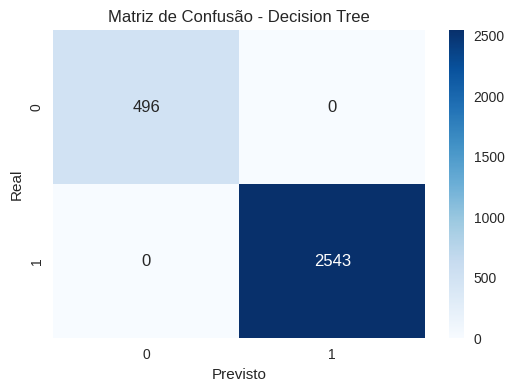

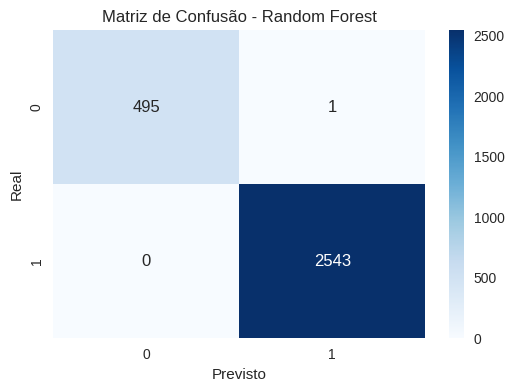

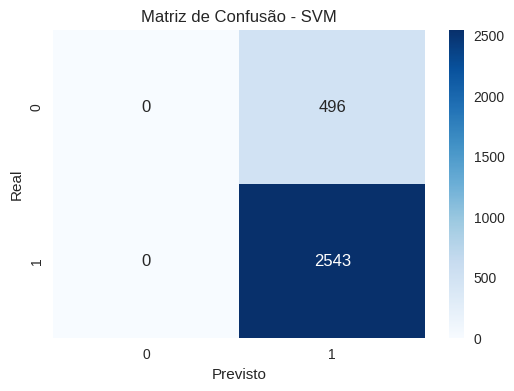

In [ ]:
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {name}')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

Curva ROC (Receiver Operating Characteristic) e AUC

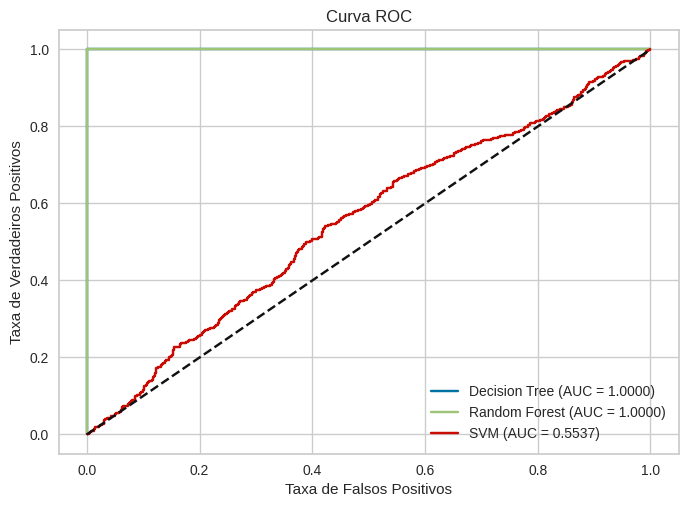

In [ ]:
for name, clf in classifiers.items():
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label='Existing Customer') # Added pos_label argument

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred_prob):.4f})')

plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend()
plt.show()

Importância e Contribuição das Características

In [ ]:
importances = classifiers['Random Forest'].feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

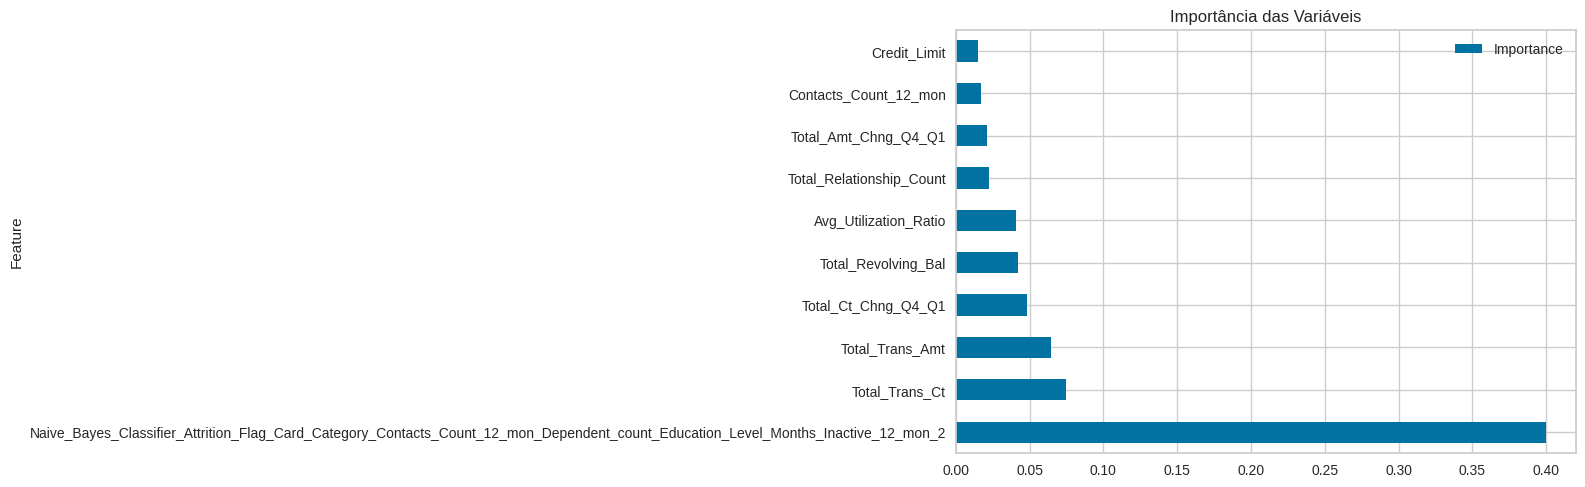

In [ ]:
top_features = importance_df.head(10)
top_features.plot(kind='barh', x='Feature', y='Importance', title='Importância das Variáveis')
plt.show()